<a href="https://colab.research.google.com/github/furkanyigit0/furkanyigit0/blob/main/(Estimations)Lineer_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

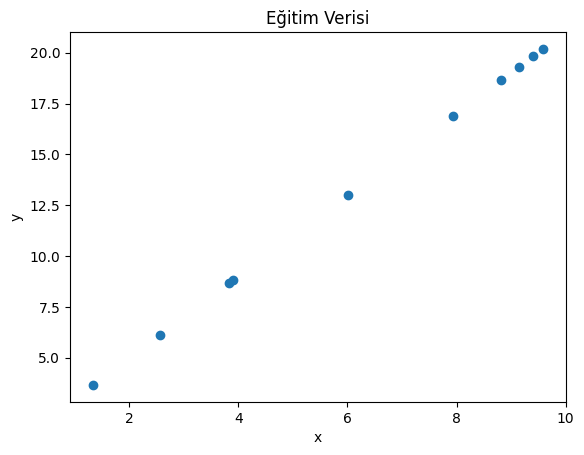

Epoch [20/200], Loss: 0.0685
Epoch [40/200], Loss: 0.0592
Epoch [60/200], Loss: 0.0512
Epoch [80/200], Loss: 0.0443
Epoch [100/200], Loss: 0.0383
Epoch [120/200], Loss: 0.0332
Epoch [140/200], Loss: 0.0287
Epoch [160/200], Loss: 0.0248
Epoch [180/200], Loss: 0.0215
Epoch [200/200], Loss: 0.0186


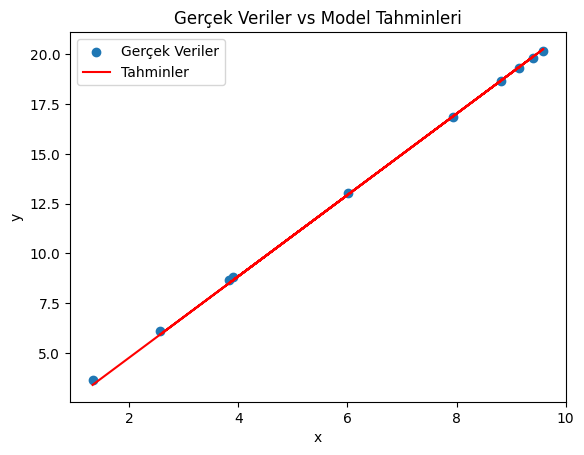

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Rastgele bir seed
torch.manual_seed(42)

# Eğitim veri seti
x = torch.rand(10, 1) * 10  # 0 ile 10 arasında 100 tane rastgele x değeri
y = 2 * x + 1  # y = 2x + 1 lineer ilişkisi

# Gerçek verilere görsel olarak bakalım
plt.scatter(x.numpy(), y.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.title('Eğitim Verisi')
plt.show()

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

criterion = nn.MSELoss()  # Ortalama Kare Hata kayıp fonksiyonu
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 200
for epoch in range(epochs):
    # Sıfırdan başlayarak gradyanları hesapla
    optimizer.zero_grad()

    # İleri yayılım
    y_pred = model(x)

    # Kaybı hesapla
    loss = criterion(y_pred, y)

    # Geri yayılım
    loss.backward()

    # Ağırlıkları güncelle
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Tahminler
predicted = model(x).detach().numpy()

# Gerçek veriler ile tahminleri karşılaştıralım
plt.scatter(x.numpy(), y.numpy(), label='Gerçek Veriler')
plt.plot(x.numpy(),  predicted, label='Tahminler', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gerçek Veriler vs Model Tahminleri')
plt.legend()
plt.show()
